## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

$$ \ddot{{{\vec r}_i}} = \frac{- G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}}}{m_i} $$

$${{\vec v}_0} = 0 ,
{{\vec r}_0} = (x0,y0)$$

In [22]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.animation as animation

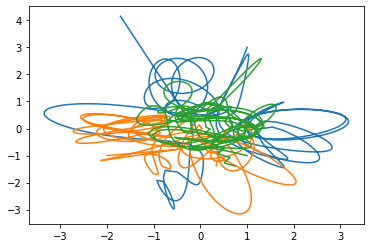

In [6]:
# timestep
t = np.arange(0,10,0.1)

#constant
G = 4*math.pi**2

# variables
m =[3,4,5]
r = np.array([[1,3],[-2,-1],[1,-1],[0,0],[0,0],[0,0]])

# y init
rdd = r.reshape(12)

#create function 
def f(r,i):
    r = np.reshape(r,(-1,2))
    s = np.zeros(2)
    for j in range(len(m)):
        if i != j:
            s += m[j] * ((r[i]-r[j])/(np.linalg.norm((r[i]-r[j])))**3)
    return -G*s


def rhs(y,t):
    return [
        y[6],y[7],y[8],y[9],y[10],y[11],
        f(y,0)[0],f(y,0)[1],
        f(y,1)[0],f(y,1)[1],
        f(y,2)[0],f(y,2)[1]
    ]    

out = odeint(rhs,rdd,t)

plt.plot(out[:,0],out[:,1])
plt.plot(out[:,2],out[:,3])
plt.plot(out[:,4],out[:,5])



In [4]:
## test cell 

# r =np.array([[1,3],[-2,-1],[-1,-1],[0,0],[0,0],[0,0]])
# xs = np.array([1,-2,-1,0,0,0])
# ys = np.array([3,-1,-1,0,0,0])

# print(((-G*m[1]*r[0]-r[1])/(np.linalg.norm(r[0]-r[1])**3))+(-G*m[2]*r[0]-r[2])/(np.linalg.norm(r[0]-r[2])**3))
# print(((-G*m[1]*r[0]-r[1])/(np.linalg.norm(r[0]-r[1])**3))+(-G*m[2]*r[0]-r[2])/(np.linalg.norm(r[0]-r[2])**3))
# print(-G*m[1]*ys[0]-ys[1]/np.linalg.norm(ys[0]-ys[1])**3)

# print((m[0]*r[1]-r[0])/(np.linalg.norm(r[1]-r[0])**3))
# print((m[2]*r[1]-r[2])/(np.linalg.norm(r[1]-r[2])**3))
# print(-G*((m[0]*r[1]-r[0])/(np.linalg.norm(r[1]-r[0])**3) + (m[2]*r[1]-r[2])/(np.linalg.norm(r[1]-r[2])**3)))
# print(xs[0]-xs[1])
# print(np.linalg.norm(r[1]-r[0]))
# print(np.linalg.norm(xs[0]-xs[1]))
# print(-G*m[1]*r[0]-r[1])
# print(np.linalg.norm(r[0]-r[1])**3)
# print((-G*m[0]*r[1]-r[0])/(np.linalg.norm(r[1]-r[0])**3))
# print((-G*m[2]*r[1]-r[2])/(np.linalg.norm(r[1]-r[2])**3))

# print(a(0,rdd))
# print(a(0,y0))
# print(y0,rdd)
# print(rhss(rdd,t))


[ 0.00000000e+00 -3.79132644e-02 -7.59105838e-02 -1.14076849e-01
 -1.52498650e-01 -1.91265169e-01 -2.30469135e-01 -2.70207843e-01
 -3.10584304e-01 -3.51708494e-01 -3.93698795e-01 -4.36683637e-01
 -4.80803387e-01 -5.26212568e-01 -5.73082460e-01 -6.21604184e-01
 -6.71992384e-01 -7.24489645e-01 -7.79371822e-01 -8.36954507e-01
 -8.97600895e-01 -9.61731375e-01 -1.02983524e+00 -1.10248490e+00
 -1.18035297e+00 -1.26423233e+00 -1.35505824e+00 -1.45392913e+00
 -1.56211450e+00 -1.68100800e+00 -1.81174689e+00 -1.95213763e+00
 -2.09941422e+00 -2.25286003e+00 -2.41202717e+00 -2.57640396e+00
 -2.74518580e+00 -2.91697158e+00 -3.08927099e+00 -3.25763903e+00
 -3.41408067e+00 -3.54397891e+00 -3.61990736e+00 -3.58856992e+00
 -3.34207336e+00 -2.65422301e+00 -1.05733131e+00  2.21333507e+00
  7.23934040e+00  1.14995431e+01  1.31006816e+01  1.30288339e+01
  1.23621964e+01  1.15560792e+01  1.07632636e+01  1.00286594e+01
  9.36083290e+00  8.75659153e+00  8.20951836e+00  7.71296176e+00
  7.26108517e+00  6.84698

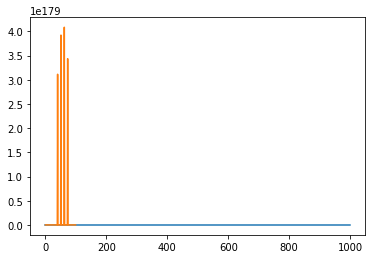

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

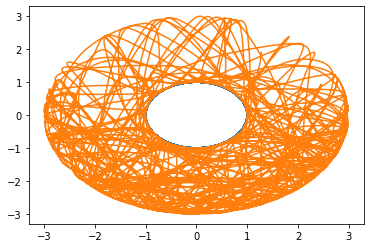

In [18]:
#timestep 
T = 100
t = np.arange(0,T,0.01)

#constant
g = 9.8

#variables
ls = [1,2]
ms = [2,1]

#y init
y0 =[1.5,3,0,0]        #[theta1,theta2,dtheta1,dtheta2]
y = [1.5,0,3,0]

def A():
    return (ms[0]+ms[1])*ls[0]

def B(y):
    return (ms[1]*ls[1]*math.cos(y[0]-y[1]))
def C(y):
    return (ms[1]*ls[1]*y[3]**2*math.sin(y[0]-y[1]))
def D(y):
    return (ms[0]+ms[1])*g*math.sin(y[0])

def E():
    return (ms[1]*ls[1])

def F(y):
    return (ms[1]*ls[0]*math.cos(y[0]-y[1]))
def G(y):
    return (ms[1]*ls[0]*y[2]**2*math.sin(y[0]-y[1]))
def H(y):
    return (ms[1]*g*math.sin(y[1]))


def rhs(y,t):
    ddtheta = ( ((G(y)-H(y)) + ((F(y)*C(y)+F(y)*D(y))/A()))/(E()-(B(y)*F(y)/A())) )
    return[
        y[2],y[3],
        -C(y)-D(y)-B(y)/A() * ddtheta,
        ddtheta
    ]

out = odeint(rhs,y0,t)
# print(out[:,2])
a = -1
plt.plot(ls[0]*np.sin(out[:a,0]),-ls[0]*np.cos(out[:a,0]))
plt.plot(ls[0]*np.sin(out[:a,0])+ls[1]*np.sin(out[:a,1]),-ls[0]*np.cos(out[:a,0])-ls[1]*np.cos(out[:a,1]))

# plt.plot(ls[0]*np.cos(out[:,0])+ls[1]*np.cos(out[:,1]),ls[0]*np.sin(out[:,0])+ls[1]*np.sin(out[:,1]))
# plt.plot(out[:,0])

# print(-ls[0]*np.cos(out[:a,0]),-ls[1]*np.cos(out[:a,1]),out[:a,1])

# plt.plot(t,out[:]) 
# plt.legend(['theta_1','theta_2','dtheta_1','dtheta_2'])



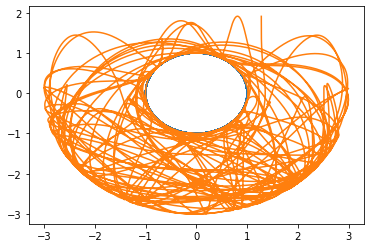

In [19]:
def rhs(y,t):
    ddtheta1 = (((H(y)*B(y)-B(y)*G(y))/E()) -C(y)-D(y)) / (A() - ((F(y)*B(y))/E()))
    return [
        y[2],y[3],
        ddtheta1,
        (G(y)-H(y)-F(y)*ddtheta1)/E()
    ]

res = odeint(rhs,y0,t)

plt.plot(ls[0]*np.sin(res[:a,0]),-ls[0]*np.cos(res[:a,0]))
plt.plot(ls[0]*np.sin(res[:a,0])+ls[1]*np.sin(res[:a,1]),-ls[0]*np.cos(res[:a,0])-ls[1]*np.cos(res[:a,1]))



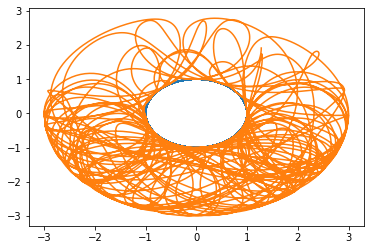

In [20]:
# equation yeeted from internet 

def rhs(y,t):
    return [
        y[2],y[3],
        (-g*(2*ms[0]+ms[1])*math.sin(y[0])-ms[1]*g*math.sin(y[0]-2*y[1])-2*math.sin(y[0]-y[1])*ms[1]*(y[3]**2*ls[1]+y[2]**2*ls[0]*math.cos(y[0]-y[1])))/
        (ls[0]*(2*ms[0]+ms[1]-ms[1]*math.cos(2*y[0]-2*y[1]))),
         ((2*math.sin(y[0]-y[1])*(y[3]**2*ls[0]*(ms[0]+ms[1])+g*(ms[0]+ms[1])*math.cos(y[0])+y[3]**2*ls[1]*ms[1]*math.cos(y[0]-y[1])))/
          (ls[1]*(2*ms[0]+ms[1]-ms[1]*math.cos(2*y[0]-2*y[1]))))
         ]
tester = odeint(rhs,y0,t)

plt.plot(ls[0]*np.sin(tester[:a,0]),-ls[0]*np.cos(tester[:a,0]))
plt.plot(ls[0]*np.sin(tester[:a,0])+ls[1]*np.sin(tester[:a,1]),-ls[0]*np.cos(tester[:a,0])-ls[1]*np.cos(tester[:a,1]))

# plt.plot(t,tester[:])
# plt.legend(['theta_1','theta_2','dtheta_1','dtheta_2'])

MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

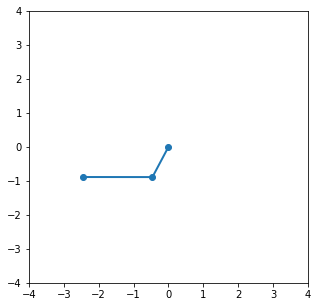

In [28]:

fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
mass1, = ax.plot([], [], 'g.', markersize=15)
mass2, = ax.plot([], [], 'r.', markersize=20)
line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    mass1 = np.array([ls[0]*np.sin(out[i,0]),-ls[0]*np.cos(out[i,0])])
    mass2 = np.array([ls[1]*np.sin(out[i,1])+ls[0]*np.sin(out[i,0]), -ls[1]*np.cos(out[i,1])-ls[0]*np.cos(out[i,0])])
    line.set_data([0,mass1[0],mass2[0]],[0,mass1[1],mass2[1]])
    return line

anim = animation.FuncAnimation(fig, animate,frames=1000, repeat=False)
anim.save('dblpend1.gif', fps = 20)
plt.show

MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

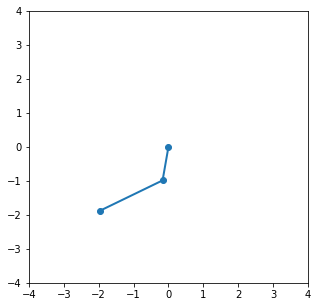

In [27]:

fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
mass1, = ax.plot([], [], 'g.', markersize=15)
mass2, = ax.plot([], [], 'r.', markersize=20)
line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    mass1 = np.array([ls[0]*np.sin(res[i,0]),-ls[0]*np.cos(res[i,0])])
    mass2 = np.array([ls[1]*np.sin(res[i,1])+ls[0]*np.sin(res[i,0]), -ls[1]*np.cos(res[i,1])-ls[0]*np.cos(res[i,0])])
    line.set_data([0,mass1[0],mass2[0]],[0,mass1[1],mass2[1]])
    return line

anim = animation.FuncAnimation(fig, animate,frames=1000, repeat=False)
anim.save('dblpend2.gif', fps = 20)
plt.show

MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

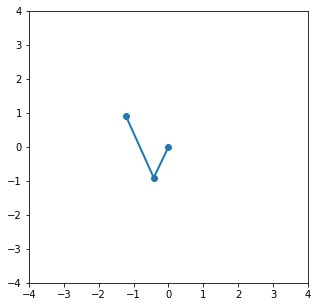

In [29]:

fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
mass1, = ax.plot([], [], 'g.', markersize=15)
mass2, = ax.plot([], [], 'r.', markersize=20)
line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    mass1 = np.array([ls[0]*np.sin(tester[i,0]),-ls[0]*np.cos(tester[i,0])])
    mass2 = np.array([ls[1]*np.sin(tester[i,1])+ls[0]*np.sin(tester[i,0]), -ls[1]*np.cos(tester[i,1])-ls[0]*np.cos(tester[i,0])])
    line.set_data([0,mass1[0],mass2[0]],[0,mass1[1],mass2[1]])
    return line

anim = animation.FuncAnimation(fig, animate,frames=1000, repeat=False)
anim.save('dblpend3.gif', fps = 20)
plt.show